In [ ]:
##https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated?select=World-happiness-report-updated_2024.csv

In [16]:
import pandas as pd

In [32]:
df = pd.read_csv('C:/Users/gf/Downloads/WHR_2024.csv')

In [40]:
print(df.head())

  Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277               1.803           1.513                    0.740   

   Freedom to make life choices  Generosity  Perceptions of co

In [35]:
desc_stats = df.describe()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
        Ladder score  upperwhisker  lowerwhisker  Log GDP per capita  \
count    143.000000    143.000000    143.000000          140.000000   
mean       5.527580      5.641175      5.413972            1.378807   
std        1.170717      1.155008      1.187133            0.425098   
min        1.721000      1.775000      1.667000            0.000000   
25%        4.726000      4.845500      4.606000            1.077750   
50%        5.785000      5.895000      5.674000            1.431500   
75%        6.416000      6.507500      6.319000            1.741500   
max        7.741000      7.815000      7.667000            2.141000   

       Social support  Healthy life expectancy  Freedom to make life choices  \
count      140.000000               140.000000                    140.000000   
mean         1.134329                 0.520886                      0.620621   
std          0.333317                 0.164923                      0.162492   
min          0.

In [37]:
print(df.columns)

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')


In [39]:
#  columns like'Country' or 'Region'  are dropping and calculating correlation matrix for rest of the columns
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                               Ladder score  upperwhisker  lowerwhisker  \
Ladder score                      1.000000      0.999678      0.999697   
upperwhisker                      0.999678      1.000000      0.998750   
lowerwhisker                      0.999697      0.998750      1.000000   
Log GDP per capita                0.768504      0.761804      0.774531   
Social support                    0.813542      0.811550      0.814992   
Healthy life expectancy           0.759659      0.751042      0.767506   
Freedom to make life choices      0.644451      0.646309      0.642291   
Generosity                        0.130038      0.129602      0.130446   
Perceptions of corruption         0.451829      0.448847      0.454480   
Dystopia + residual               0.533542      0.542267      0.524816   

                              Log GDP per capita  Social support  \
Ladder score                            0.768504        0.813542   
upperwhisker                

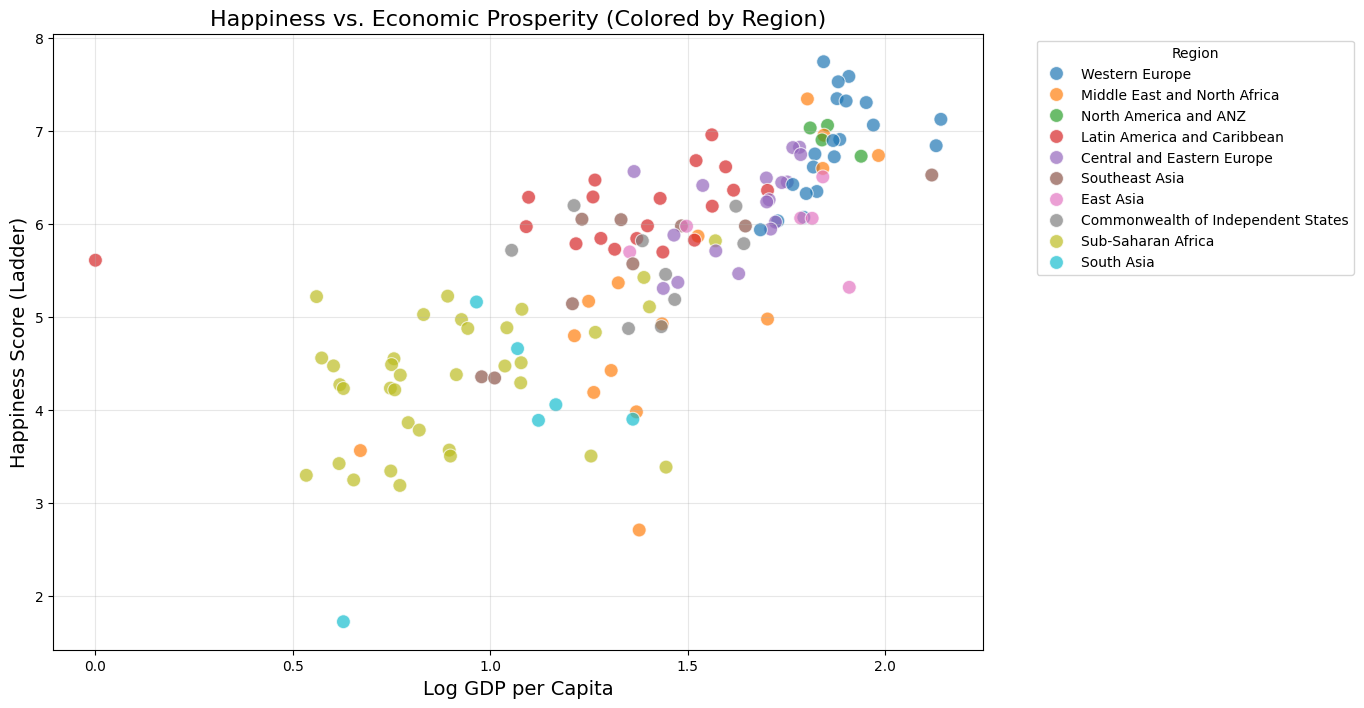

In [43]:
#Scatter Plot Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Log GDP per capita',
    y='Ladder score',
    hue='Regional indicator',
    palette='tab10',
    s=100,
    alpha=0.7
)
plt.title('Happiness vs. Economic Prosperity (Colored by Regions)', fontsize=16)
plt.xlabel('Log GDP per Capita', fontsize=14)
plt.ylabel('Happiness Score (Ladder)', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

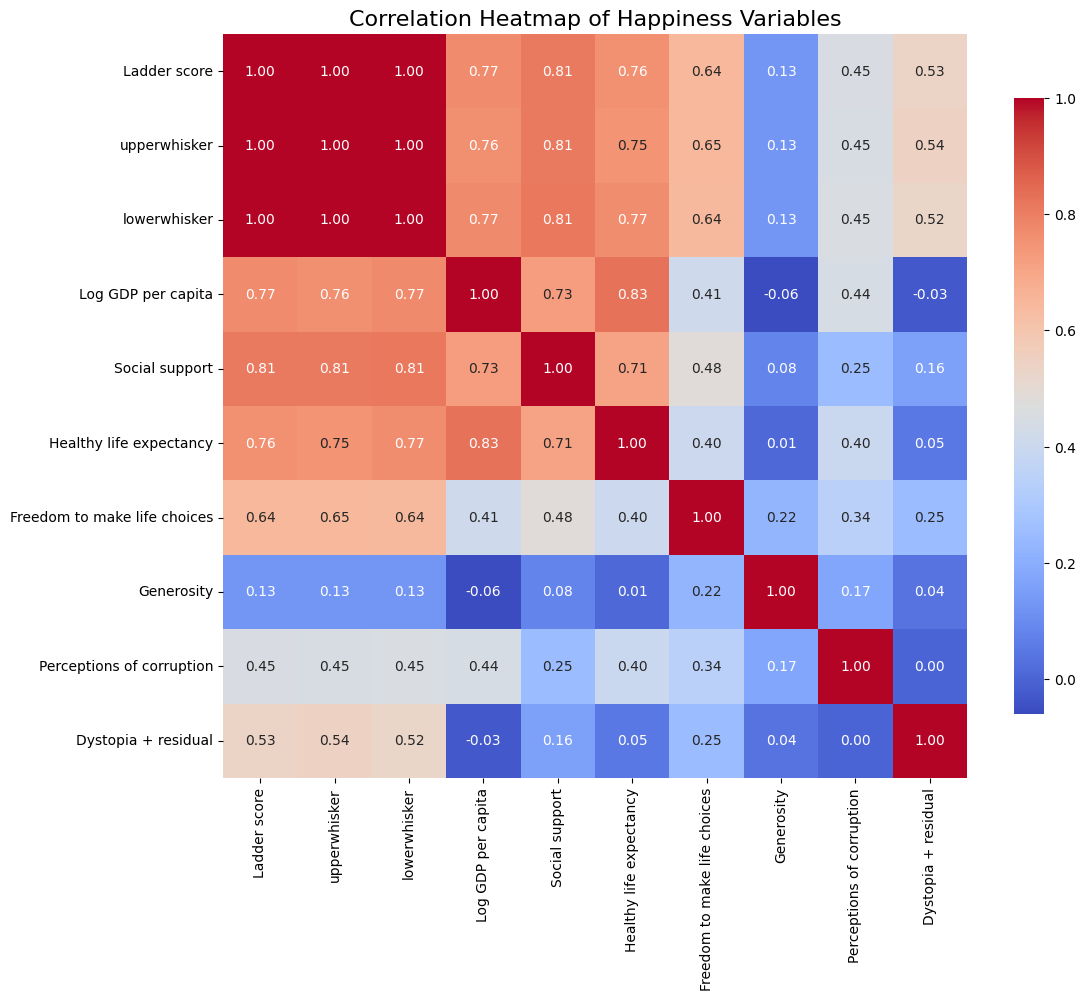

In [45]:
# Heatmap Visualization, (only numeric columns)
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    square=True,
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Heatmap of Happiness Variables', fontsize=16)
plt.show()

C:\Users\gf\AppData\Local\Temp\ipykernel_35084\1386675461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


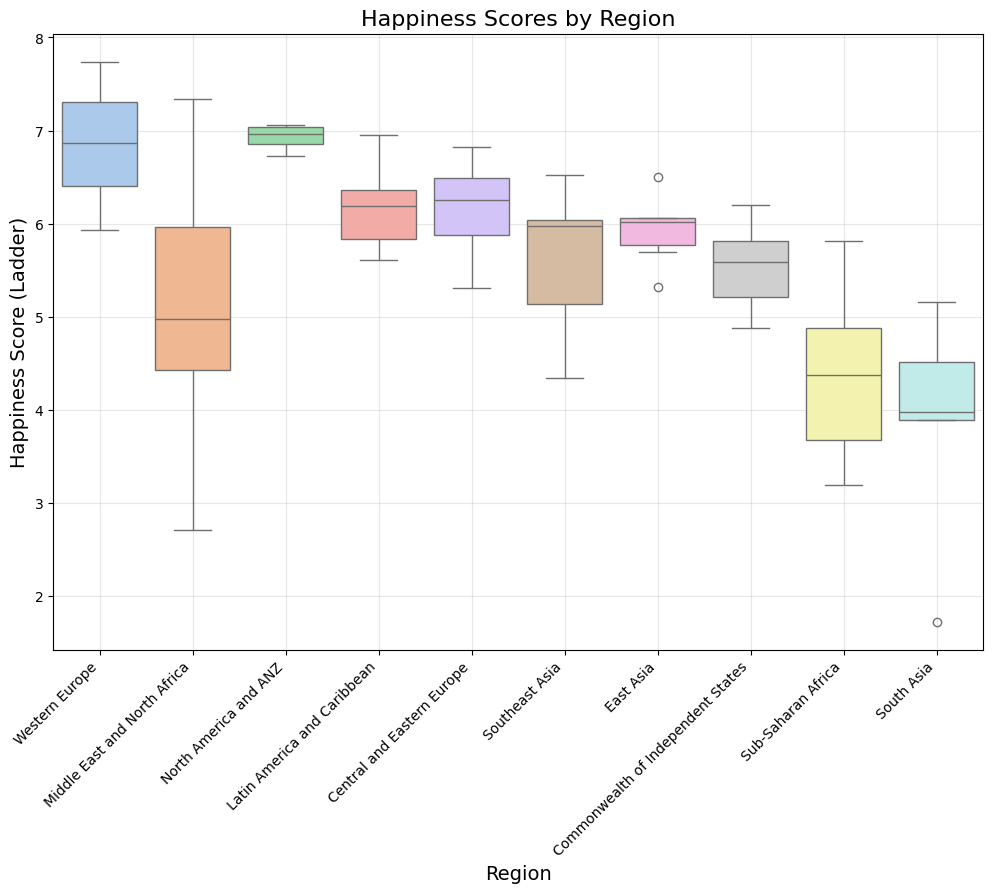

In [46]:
#Box plot for regional comparison
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df, 
    x='Regional indicator', 
    y='Ladder score', 
    palette='pastel'
)
plt.title('Happiness Scores by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Happiness Score (Ladder)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.show()

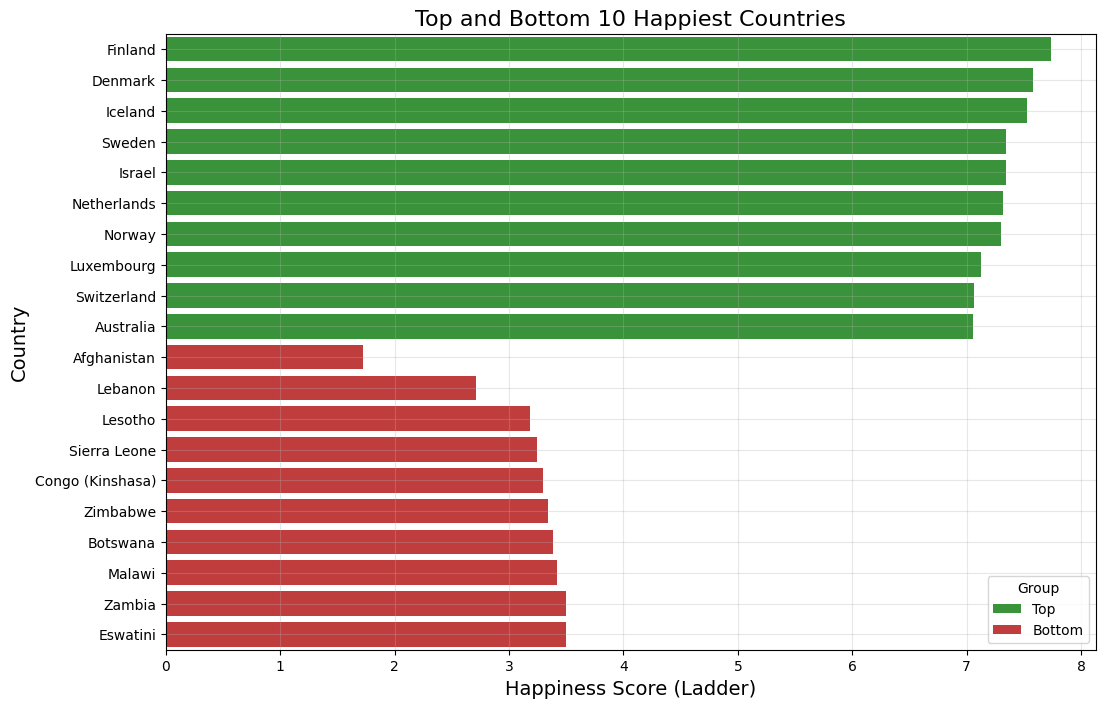

In [47]:
# Top_10 happiest countries
top_10 = df.nlargest(10, 'Ladder score')
# Bottom_10 least happy countries
bottom_10 = df.nsmallest(10, 'Ladder score')

plt.figure(figsize=(12, 8))
sns.barplot(
    data=pd.concat([top_10, bottom_10]),
    x='Ladder score',
    y='Country name',
    hue=['Top'] * len(top_10) + ['Bottom'] * len(bottom_10),
    dodge=False,
    palette=['#2ca02c', '#d62728']
)
plt.title('Top and Bottom 10 Happiest Countries', fontsize=16)
plt.xlabel('Happiness Score (Ladder)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(title='Group', loc='lower right')
plt.show()